# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from src.si.data import Dataset
from src.si.util.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [5]:
preprocess(train)
preprocess(test)

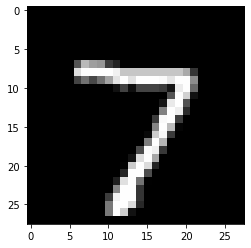

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Tanh, Sigmoid

Build the model

In [8]:
net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))  # ao fazer a convolução
# a janela, que é 3x3, nao consegue passar na matriz inteira, nomeadamente
# nos ultimos dois elemenos, daí este dense passar a ser 26x26
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [9]:
net.fit(train)

epoch 1/500 error=0.4046127426622134
epoch 2/500 error=0.37905652219171204
epoch 3/500 error=0.34296683602069444
epoch 4/500 error=0.3175523638645496
epoch 5/500 error=0.30250071144115726
epoch 6/500 error=0.2901520440881967
epoch 7/500 error=0.27870926772909255
epoch 8/500 error=0.2676072784962346
epoch 9/500 error=0.2564428642233986
epoch 10/500 error=0.24487627066501333
epoch 11/500 error=0.23264412175244042
epoch 12/500 error=0.21963698246990537
epoch 13/500 error=0.2060193204787538
epoch 14/500 error=0.19227188054535746
epoch 15/500 error=0.1790264197113783
epoch 16/500 error=0.1667955981737303
epoch 17/500 error=0.15583705949608168
epoch 18/500 error=0.1462013450679362
epoch 19/500 error=0.13783671915174756
epoch 20/500 error=0.13065508544379695
epoch 21/500 error=0.12455415922807264
epoch 22/500 error=0.11942191805199165
epoch 23/500 error=0.11513958731829317
epoch 24/500 error=0.11158709141321717
epoch 25/500 error=0.10864946996357372
epoch 26/500 error=0.10622208812788833
epoc

In [10]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
conv = net.layers[0]

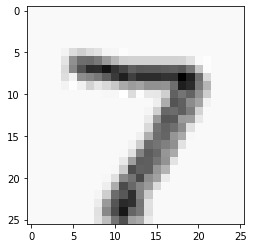

In [12]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))

Add maxpooling layer

In [13]:
from src.si.supervised.nn import MaxPooling

net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))  # sairá como 26*26*1
net.add(Activation(Tanh()))  # crash aqui logo no primeiro backpropagation
# ter em atenção  dimensão do pooling
net.add(MaxPooling((2, 2)))  # esta esta a correr, sairá como 13*13*1
net.add(Activation(Tanh()))
net.add(Flatten())  # fica um vetor 1D
net.add(Dense(13*13*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))
net.add(Activation(Sigmoid()))

Train model again

In [14]:
net.fit(train)

conv = net.layers[0]

plot_img(conv.forward(test.X[:1]),shape=(26,26))

ValueError: operands could not be broadcast together with shapes (500,26,26,1) (500,13,13,1) 